<a href="https://colab.research.google.com/github/amorelo01/simulacion/blob/main/ANDRES_CAMILO_ZU%EF%BF%BDIGA_MORELO_05_GeneracionDeVariablesAleatorias_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="UdeA" height="150px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<img alt="CC" height="150px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Ingenier%C3%ADa_Industrial_UdeA.png/1026px-Ingenier%C3%ADa_Industrial_UdeA.png" align="right" hspace="0px" vspace="0px">
<br><br>
<p>
<h1><center><b> Generación de Variables Aleatorias </b></center></h1>
<br>
<h1><center><b> Student Edition 🤓🤓🤓🤓 </b></center></h1>
<br>
<hr size=10 noshade color="green">
</p>
<p>
<img alt="CC" height="70px" src="https://mirrors.creativecommons.org/presskit/icons/by.xlarge.png" align="left" hspace="0px" vspace="0px">
<img alt="Attribution" height="70px" src="https://mirrors.creativecommons.org/presskit/icons/nc.xlarge.png" align="left" hspace="0px" vspace="0px">
<img alt="NC" height="70px" src="https://mirrors.creativecommons.org/presskit/icons/sa.xlarge.png" align="left" hspace="0px" vspace="0px">
<img alt="SA" height="70px" src="https://creativecommons.org//wp-content/themes/vocabulary-theme/vocabulary/svg/cc/icons/cc-icons.svg#cc-logo" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">
<h2> <b> Por: Julián Andrés Castillo G. </b> </h2>
<a href="mailto:jandres.castillo@udea.edu.co"> ✉ Julian Andres Castillo Grisales </a>
<h2> <b> Por: Yony Fernando Ceballos. </b> </h2>
<a href="mailto:yony.ceballos@udea.edu.co"> ✉ Yony Fernando Ceballos </a>
</div>

<br>

**El presente curso hace parte de la Ingeniería Industrial de la Universidad de Antioquia.**

Imagenes y teoría tomado de:
*   Banks, J. (2010). Discrete Event system Simulation. In Encyclopedia of Information Systems. https://doi.org/10.1016/b0-12-227240-4/00045-9
---

#**Generación aleatoria de variables**

Las variables se modelan como variables aleatorias con alguna distribución de probabilidad especificada, y existen procedimientos estadísticos estándar para estimar los parámetros de la distribución hipotética y para probar la validez del modelo estadístico asumido.

El propósito es explicar e ilustrar algunas técnicas ampliamente utilizadas para generar variables aleatorias.

#**Distribución Generadora**

# Importancia de la Distribución Uniforme para Generar Otras Distribuciones

La distribución uniforme es la distribucion más importante en estadísticas y teoría de probabilidad. Se define por su constancia, ya que todos los eventos tienen la misma probabilidad de ocurrir dentro de un rango especificado. La importancia de la distribución uniforme, especialmente en el contexto de generar otras distribuciones, se puede describir de la siguiente manera:

1. **Fundamento de la simulación de Monte Carlo:**
   En técnicas de simulación, como el método de Monte Carlo, se generan números aleatorios con una distribución uniforme para después transformarlos y obtener números con otras distribuciones deseadas.

2. **Transformación inversa:**
   Dado que cualquier variable aleatoria continua tiene una función de distribución acumulada que va de 0 a 1, si generamos un número aleatorio $u$ de una distribución uniforme entre 0 y 1 y encontramos $x$ tal que $F(x) = u$ (usando la inversa de la FDA), obtenemos un número aleatorio con la distribución deseada.

3. **Composición de otras distribuciones:**
   A través de combinaciones y transformaciones de variables uniformes, es posible generar una amplia variedad de distribuciones. Por ejemplo, si sumas varias variables aleatorias uniformemente distribuidas, se aproxima a una distribución normal (de acuerdo con el teorema del límite central).

4. **Base para pruebas estadísticas:**
   La distribución uniforme es fundamental para pruebas de bondad de ajuste como el test de Kolmogorov-Smirnov, que compara la secuencia empírica de una muestra de datos con una secuencia teórica.

5. **Generadores de números aleatorios:**
   Muchos algoritmos de generación de números aleatorios producen números que siguen una distribución uniforme. Estos números luego se pueden transformar para simular otras distribuciones.

6. **Fácil de entender y trabajar:**
   La simplicidad de la distribución uniforme facilita su uso como punto de partida en muchos análisis y experimentos.

7. **Homogeneidad:**
   Dado que todos los valores en un rango específico tienen la misma probabilidad, es útil en situaciones donde no hay razón para dar más peso a un valor sobre otro.

En resumen, la distribución uniforme es una herramienta esencial en estadísticas y teoría de probabilidad. Su simplicidad y propiedades la hacen ideal como punto de partida para generar y transformar en otras distribuciones.


In [17]:
import random as rnd
import matplotlib.pyplot as plt
import statistics as st


##**Transformada Inversa**

Nuestra fuente de numeros aleatorios es `Random --> random()` generando números aleatorios `[0,1)` uniformes $R_1, R_2, ..., R_i$.
Cada $R_i$ tiene su respectiva $PDF$ y $CDF$ determinadas a continuación.
*    PDF (Función de densidad de probabilidad)
>*    $f_R(x) = \begin{cases}1, & 0\leq x \leq 1\\0, & {en\;otros\; caso}\end{cases}$

*    CDF (Función de distribución acumulativa)
>*    $F_R(x) = \begin{cases}0, & x < 0\\x, & 0\leq x \leq 1\\ 1, & x > 1\end{cases}$

Computacionalmente, es la técnica más directa, pero no siempre la más eficiente.

###**Pasos para realizar el procedimiento**

El método de la transformada inversa puede utilizarse para simular variables aleatorias continuas, lo cual se logra mediante la función acumulativa $F(x)$ y la generación de números aleatorios, el método consiste en:
1.    Paso 1: Definir la función de densidad $f(x)$ que represente la variable a modelar.
2.    Paso 2: Calcular la función acumulativa $F(x)$ (Integrar)
3.    Paso 3: Despejar la variable aleatoria $x$ y obtener la función acumulada inversa $F^{-1}(R)$
4.    Paso 4: Generar variables aleatorias $x$, sustituyendo los valores con números aleatorios en la función acumulada inversa.

*    $R$ = número aleatorio.
*    $F(x)$ = función acumulada de probabilidad.
>*   $f(x)=\int_{-\infty}^{x} f(x)dx = R$
>>Despejando se tiene:
>>*    $X = F^{-1}(R)$


###**Ejemplo Transformada inversa**

$PDF = \frac{x^2}{9} \rightarrow 0\leq x \leq 3$

Desarrolle un generador para dicha distribucion, genere 1000 valores aleatorios, compare la media de los valores generados con la media analítica.

Solución:

*    Media Analítica = $f(x)=\int_{a}^{b} xf(x)dx$
>*    $\int_{0}^{3} x(\frac{x^2}{9}) \rightarrow \int_{0}^{3} \frac{x^3}{9} \rightarrow  \frac{x^4}{36}\mid_0^3 \rightarrow \frac{3^4}{36}-0 = 2.25$

*    Cálculo de la transformada inversa
>*    $X = F^{-1}(R) \rightarrow \int\frac{x^2}{9} \rightarrow \frac{x^3}{27}$
>*    $\frac{x^3}{27}= R \rightarrow x^3=27R \rightarrow x=\sqrt[3]{27R} \rightarrow x=3\sqrt[3]{R}$




In [18]:
!pip install sympy

##**La distribución exponencial**

Una variable aleatoria $X$ es exponencialmente distribuida con parametro $\lambda > 0$ y su PDF está dada por:

*    $f(x) = \begin{cases}\lambda e^{-\lambda x}, & x \geq 0\\0, & {otros\; caso}\end{cases}$

$\lambda$ es una razón: llegadas por hora o servicios por minuto.

La CDF de la distribución exponencial es la siguiente:
*    $F(x) = \int_{- \infty}^x f(t)dt = \begin{cases}1 - e^{-\lambda x}, & x \geq 0\\0, & x < 0\end{cases}$

$\lambda$ se puede interpretar como el número medio de ocurrencias por unidad de tiempo. Por ejemplo, si los tiempos entre llegadas $X_1, X_2, X_3, ..., X_i$ tienen una distribución exponencial con razón $\lambda$, entonces $\lambda$ podría interpretarse como el número medio de llegadas por unidad de tiempo o la tasa de llegadas. Se debe tener en cuenta que, para cualquier $i, E(X_i) = \frac{1}{\lambda}$ se puede deducir que $\frac{1}{\lambda}$ es la media entre tiempos de llegada.

###**Distribución exponencial paso a paso**

>1.    Paso 1: Definir la función de densidad $f(x)$ que represente la variable a modelar.
>2.    Paso 2: Calcular la CDF de la variable aleatoria deseada $X$.
>*    Integrar la función de densidad $f(x)$
>>Para la distribución exponencial, la CDF es $F(x) = 1- e^{-\lambda x}, x > 0$
>3.    Paso 3: Definir $F(X)=R$ para el rango de $X$
>>Para la distribución exponencial es $R = 1- e^{-\lambda x}, X \geq 0$, $X$ es una variable aleatoria (con distribución exponencial para el presente caso) tal que $ 1- e^{-\lambda x}$ es tambien una variable aleatoria llamada $R$ y posee una distribucion uniforme entre $[0,1)$.
>4.    Paso 4: Solucionar $F(X) = R$ para $X$ en términos de $R$.
>>Para la distribución exponencial, la solución es la siguiente:
>><center> $1- e^{-\lambda x} = R$</center>
>><center> $e^{-\lambda x} = 1-R$</center>
>><center> ${-\lambda X} = \ln(1-R)$</center>
>><center> $X = -\frac{1}{\lambda}\ln(1-R)$</center>
>>
>>$X = -\frac{1}{\lambda}\ln(1-R)$ la presente ecuación es llamada generador de variables aleatorias para la distribución exponencial. Esta ecuación es también escrita como $X = F^{-1}(R)$
>5.    Paso 5: Generar números aleatorios uniformes $R_!, R_2, R_3, ..., R_i$ y calcular valores aleatorios deseados usando $X = -\frac{1}{\lambda}\ln(1-R)$.
>>Para el caso exponencial $F^{-1}(R) = -\frac{1}{\lambda}\ln(1-R)$ por lo tanto,
>>
>><center> $X_i = -\frac{1}{\lambda}\ln(1-R_i)$</center>
>>Para $i = 1, 2, 3, ..., i$ la simplificación de esta ecuación es reemplazar $(1-R_i)$ por $R_i$ para quedar en:
>><center> $X_i = -\frac{1}{\lambda}\ln(R_i)$</center>
>>Esta forma alternativa es justificada en tanto que $R_i$ y $1-R_i$ son ambas uniformemente distribuidas entre $[0,1)^*$.


\* Para Python el módulo `Random` y en especial el método `random()` produce números aleatorios entre cero (inclusive) y uno sin incluirlo.

```python
import random
help(random.random)

    Help on built-in function random:

    random(...) method of random.Random instance
        random() -> x in the interval [0, 1).
```

<img alt="Exponencial_TomadoDeBanks" height="300px" src="https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/Exponencial.png" align="center">

In [19]:
valorlambda = "2.0" #@param ["0.1", "0.5", "1.0", "1.5", "2.0"]
Repeticiones = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

##**La distribución uniforme**

Considere una variable aleatoria $X$ la cual es uniformemente distribuida en el intervalo $[𝑎,𝑏]$. Una suposición razonable para generar x viene dada por:
<h3>
<center>$X = a+(b-a)R$</center>

La PDF de $X$ es dada por:

<center>$f(x) = \begin{cases}\frac{1}{b-a}, & a\leq x \leq b\\0, & {en\;otros\; caso}\end{cases}$</center>


La CDF de $X$ es dada por:

<center>$F(x) = \begin{cases}0, & x < a\\\frac{x-a}{b-a}, & a\leq x \leq b\\ 1, & x > 1\end{cases}$</center>

Realizando la transformada inversa:

<center>$F(x) = \frac{X-a}{b-a}=R$</center>
<center>$X = a + (b-a)R$</center>

Su media y su varianza son las siguientes:

<center>$Media = E(x) = \frac{a+b}{2}$</center>
<center>$Varianza = \frac{(b-a)^2}{12}$</center>

<img alt="Uniforme Tomado De Banks" height="300px" src="https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/Uniforme.png" align="center">

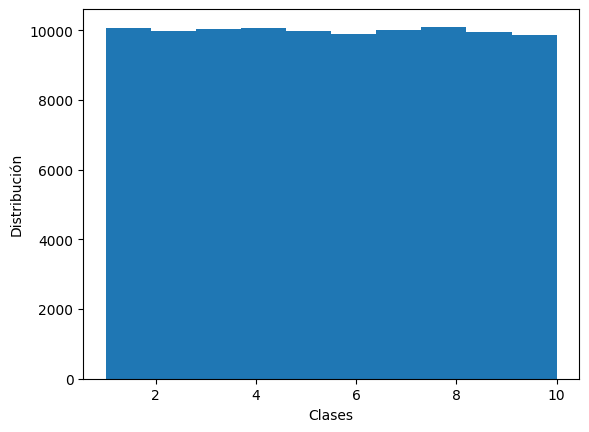

5.49137110850355
6.735818666210492


In [20]:
def Uniforme(a, b):
    x = a + (b - a)*rnd.random()
    return x
rnd.uniform(10,20)
dato = []
for i in range(100000):
    d = Uniforme(1,10)
    dato.append(d)
plt.hist(dato)
plt.ylabel('Distribución')
plt.xlabel('Clases')
plt.show()
print(st.mean(dato))
print(st.variance(dato))

##**La distribución triangular**

La distribución de probabilidad triangular tiene el comportamiento de incrementar la variable partiendo de un término $a$ (valor mínimo) hasta un término $b$ (moda), y luego disminuir a partir de $b$ (moda) hasta un término $c$ (valor máximo).
Es una distribución continua acotada en ambos lados. La distribución triangular se utiliza cuando hay pocos o no hay datos disponibles. La distribución de probabilidad triangular se presenta en la siguiente figura:

<img alt="TriangularBanks" height="300px" src="https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/Triangular.png" align="center">

Para calcular las áreas de la distribución de probabilidad se hace lo siguiente:

>*    $A = A_1 + A_2 = 1$
>
>*    $A_1 = \frac{b-a}{c-a}$
>
>*    $A_2 = \frac{c-b}{c-a}$
>
>*    $Area = \frac{base*altura}{2} = 1$
>
>*    $A = \frac{(c-a)h}{2} = 1$

Generar variables aleatorias de la distribución triangular se realiza en dos maneras, dependiendo del intervalo $(a, b)$ y el intervalo $(b, c)$.

*    En resumen la PDF seria como se muestra a continuación:
>*    $f(x) = \begin{cases} \frac{2(x-a)}{(b-a)(c-a)}, & si\;a \leq x \leq b\\\ \frac{2(c-x)}{(c-b)(c-a)}, & si\;b < x \leq c\end{cases}$
>
> Donde $a \leq b \leq c$. La moda ocurre en $x=b$.
>> $E(X) = \frac{a+b+c}{3}$
>>
>> $Moda = b = 3E(X)-(a+c)$

*    En resumen la CDF seria como se muestra a continuación:
>*    $F(x) \begin{cases}
0, & x \leq a \\
\frac{(x-a)^{2}}{(b-a)(c-a)}, & a \leq x \leq b \\
1- \frac{(c-x)^{2}}{(c-b)(c-a)}, & b \leq x \leq c \\
1, & x \geq c
\end{cases}$

*    La generación de la variable triangular es:
>*    $X = \begin{cases} a + \sqrt{((b-a)(c-a)R}, & si\;a \leq x \leq \frac{b-a}{c-a} \\\ c - \sqrt{(c-a)(c-b)(1-R)}, & si\;a \leq x \leq \frac{c-b}{c-a} \end{cases}$

Para generar variables aleatorias triangulares se necesitan los valores 𝑎, 𝑏 y 𝑐 que representan el valor mínimo, el valor mas probable y el valor máximo respectivamente.


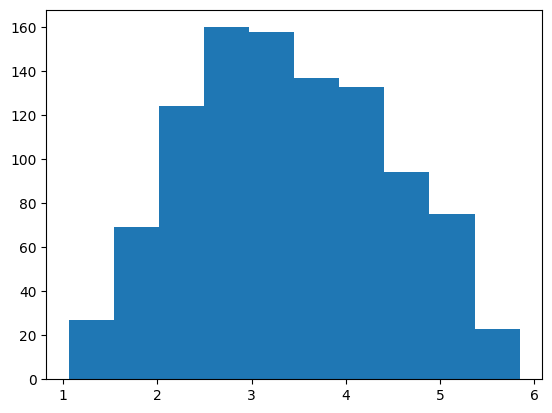

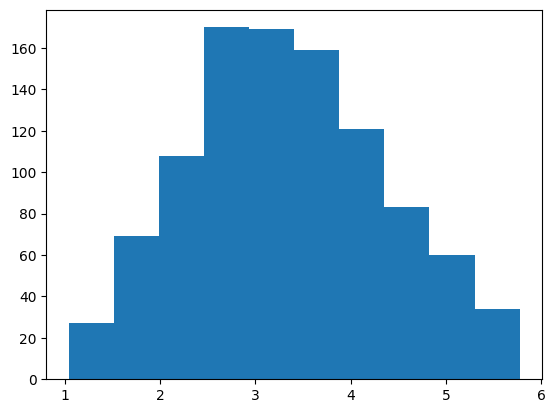

In [21]:
def Triangular(a, b, c):
    R = rnd.random()
    if R <= ((b-a)/(c-a)):
        a1 = ((c-a)*(b-a))*R
        t = a + (a1**(1/2))
    else:
        a2 = ((1-R)*(c-b)*(c-a))
        t = c - (a2**(1/2))
    return t
# Tarea probar la distribucion
v = []
for i in range(1000):
    v.append(Triangular(1,3,6))
plt.hist(v)
plt.show()
y = []
for i in range(1000):
    y.append(rnd.triangular(1,6,3))
plt.hist(y)
plt.show()


##**La distribución Bernoulli**

La PDF de la distribución Bernoulli está dada por :
*    $p(x) = p^xq^{x-1} \; para\;toda\;x\;, x=0,1$
*    $p$ probabilidad de exito
*    $q$ probabilidad de fracaso = $1-p$
*    Los valores de x son:
>*    $x=0$ si la probabilidad es de $1-p$
>*    $x=1$ si la probabilidad es de $p$

La CDF es la siguiente:
>*    $F(x) = \begin{cases} 1-p, & si\;x=0 \\\ p, & si\;x=1 \end{cases}$

Para generar variables aleatorias binarias se tiene:
>*    $x = \begin{cases} 0, & si\;0 \leq R \leq 1-p \\\ 1, & si\;1-p < R \leq 1 \end{cases}$

El parametro $p$ debe ser proporcionado y en caso contrario se tomara el valor esperado  (media) de la distribución de $0.5$.


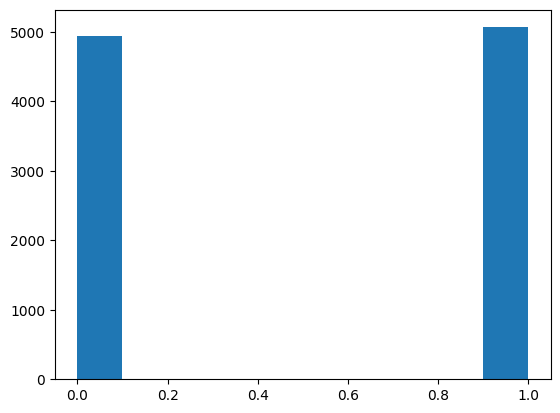

In [22]:
def Bernoulli(p=0.5):
    r = rnd.random()
    if r < p:
        return 1
    else:
        return 0
# Tarea probar la distribucion
q = []
for _ in range(10000):
    q.append(Bernoulli())
plt.hist(q)
plt.show()

##**La distribución Binomial**

Una distribucion Binomial existe cuando se satisfacen las siguientes condiciones:

*    Se realiza un experimento $n$ veces.
*    Cada experimento es independiente de los demas.
*    El espacio de la prueba de cada experimento tiene dos elementos

La PDF es la siguiente:
>*    $p(x) = \left(\begin{array}{c}n\\ x\end{array}\right) p^xq^{n-x}, \;para\;todo\;x, \;x=0,1,2,3,...,n$
>
>
>*    $p(x) = \frac{n!}{x!(n-x)!}p^xq^{n-x}$
>
>Donde
>>*    $n = numero\;de\;ensayos$
>>*    $x = numero\;de\;exitos$
>>*    $p = probabilidad\;de\;exito$
>>*    $q = probabilidad\;de\;fracaso$

###**La distribución Binomial - Método de Convolución**
En ocasiones no es posible aplicar el método de la transformada inversa a distribuciones de probabilidad, debido principalmente a que algunas de ellas no tienen forma de integrarse, como el caso de la distribución normal, binomial, Erlang (suma de exponenciales), etcétera.

En tal caso, se requiere la aplicación de algunas propiedades estadísticas como la propiedad de convolución, que permiten generar una distribución mediante la suma de distribuciones más sencillas, mediante la transformada $z$. Estos son procedimientos especiales para lograr expresiones matemáticas que generen las variables aleatorias deseadas.

La variable aleatoria binomial con parámetros $n$ y $p$ puede ser generada a través de la suma de $n$ variables con distribución Bernoulli:
*    $X$ = variable aleatoria binomial
*    $X_i$ = variable aleatoria de Bernoulli

Expresándose de la siguiente manera:

>*    $X = \sum_{i=1}^{n} X_i$


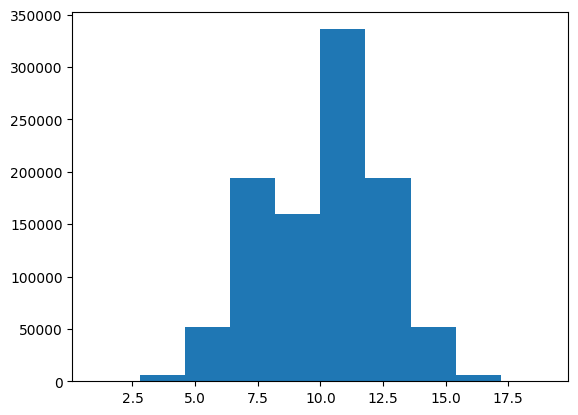

In [23]:
import random as rnd
def Binomial(p, n):
    sum = 0
    for i in range(n):
        sum+=Bernoulli(p)
    return sum
Binomial(0.5, 10)
w = []
for _ in range(1000000):
    w.append(Binomial(0.5, 20))
plt.hist(w)
plt.show()

##**Método de Aceptación y Rechazo**


El método de Aceptación y Rechazo está basado en la función de densidad $f(x)$ y no en la función de distribución $F(x)$, como el de la transformación inversa.

Para poder usar este método se requiere que la función de densidad sea acotada y que el rango de variación de la variable aleatoria sea finito, esto es,  $𝑎 ≤ 𝑥 ≤ 𝑏$

El método se basa en encerrar la función de densidad dentro de un rectángulo cuya altura es el valor máximo de dicha función ($M$) y cuya base es el rango de variación de la variable aleatoria (entre $a$ y $b$), luego se generan parejas de números aleatorios, y aceptar aquellas parejas que queden bajo la curva definida por la función de densidad de la variable de interés.

###**Pasos del Método de Aceptación y Rechazo**
Se utilizará a $M$ como el valor máximo de $f(x)$ para definir si aceptamos o rechazamos cada valor aleatorio $x$ generado y que siga la distribución $f(x)$ calculando una probabilidad para aceptar a $x$ como un numero que siga la distribución $f(x)$.

>**Pasos**
>>1.   Calcular $M=max(f_{x}(x))$
>>>*   $x \in (a,b)$
>>2.   Calcular $g(x)=\frac{(f_{x}(x))}{M}$
>>3.   Generar dos numeros aleatorios $r_1$ y $r_2$
>>4.   Generar $x = a+(b-a)r_1$
>>5.   Si $r_2 \leq g(x)$  se acepta $x$ de lo contrario regresa a $1$.

<img alt="AceptacionRechazo" height="300px" src="https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/AceptacionRechazo.png" align="center">



###**Ejemplo Método Aceptación y Rechazo**

1.   $Sea\;f(x) = 30x(1-x)^4 \rightarrow \forall x \in [0,1]$
2.   $Sea\;g(x) = max(f(x)) \; \forall x \in [0,1]$
>*   Se puede encontrar mediante procesos analíticos o mediante métodos de búsqueda
>>*   Analitico.
>>>*   $f'(x)=30(1-x)^4 - 120x(1-x)^3$
>>>*   $f'(x)=0\rightarrow\frac{1}{5} \rightarrow f(\frac{1}{5})=2,4576$

Algoritmo mediante metodo de busqueda $\downarrow$



##**Distribución [Poisson](https://translate.google.com/?sl=fr&tl=es&text=poisson&op=translate&hl=es)**


La distribución de Poisson se aplica en aquellos procesos de conteo en los cuales el número de eventos depende únicamente de la longitud del intervalo de tiempo. Por ejemplo, el número de personas que llegan a recibir servicio en un intervalo de tiempo fijo, el número de llamados por minuto que entran a un conmutador, el número de defectos por metro de tela, etc.

Para generar variables aleatorias que sigan una distribución de Poisson, no es posible usar el método de la transformada inversa, ya que $F(x)$ no tiene una forma explícita. El método más común para generar una variable Poisson es usando la relación que existe entre las distribuciones de Poisson y la exponencial. Esta relación establece que "si el número de eventos que ocurren en un intervalo de tiempo 𝒕 es un proceso de Poisson con parámetro 𝝀, entonces el tiempo entre la ocurrencia de dos eventos sucesivos sigue una distribución exponencial, con media (1/𝝀)".

La variable aleatoria exponencial puede representar:
*   La duración de un servicio.
*   El tiempo entre llegadas de clientes a un sistema.
*   El tiempo entre fallas de un componente (la duración del componente).

La variable aleatoria Poisson puede representar:
*   El número de personas que llegan a recibir servicio en un intervalo de tiempo fijo.
*   El número de llamados por minuto que entran a un conmutador.
*   El número de defectos por metro de tela.


###**Distribución Poisson - Detalle y ejecución**

Considere eventos aleatorios como la llegada de correos electrónicos a un servidor, la entrada de llamadas a un centro de atención telefónica, la llegada de personas a una tienda entre muchos otros. Estos eventos puedes ser descritos con una función que cuente llamada $N(t)$ definida para todo $t \geq 0$. Esta función representa el número de eventos ocurridos en el tiempo $[0,t]$. El tiempo cero es cuando la observación comienza sin importar si una llegada ocurre en ese momento.
Para cada intervalo $[0,t]$, el valor $N(t)$ es una observación  de una variable aleatoria donde la única opción para los valores de $N(t)$ son valores enteros $0, 1, 2, 3, …$
El proceso de contado,$\left\lbrace N(t), t \geq 0 \right\rbrace$, es denominado un proceso Poisson con tasa media $\lambda$ si se cumplen las siguientes suposiciones.
1.	Las llegadas se producen de una en una.
2.	$\left\lbrace N(t), t \geq 0 \right\rbrace$ tiene incrementos estacionarios: La distribución del número de llegadas entre $t$ y $t + s$ depende solo de la longitud del intervalo $s$, no del punto de partida $t$. Por lo tanto, las llegadas son completamente aleatorias sin períodos de prisa o holgura.
3.	$\left\lbrace N(t), t \geq 0 \right\rbrace$ incrementos independientes: el número de llegadas durante los intervalos de tiempo no superpuestos son variables aleatorias independientes. Por lo tanto, un número grande o pequeño de llegadas en un intervalo de tiempo no tiene ningún efecto en el número de llegadas en intervalos de tiempo posteriores. Las llegadas futuras se producen completamente al azar, independientemente del número de llegadas en intervalos de tiempo pasados.

Si las llegadas se producen de acuerdo con un proceso de Poisson, cumpliendo los tres supuestos anteriores, se puede demostrar que la probabilidad de que $N(t)$ sea igual a n está dada por

<h1>
$p(x)=\frac{e^{-\lambda t}{(\lambda t})^2}{x!} \ \  \ para \ t \geq 0 \  \ y,  \ n=0,1,2,3,...$

</h1>

Para $N(t)$ la distribución de Poisson con el parámetro $\alpha = \lambda t$ su media y varianza están dadas por

$E\left[N(t)\right]=\mu = \lambda t = V\left[N(t)\right]$

La formula para la CDF es:

<h1>
$F(x)=P(X \leq x) = \sum_{j=0}^{x} \frac{e^{- \lambda t}{(\lambda t})^j}{j!}$
</h1>

###**Distribución Poisson - Formal**

En su forma más conocida la distribución de densidad de probabilidad de Poisson se expresa de la siguiente manera:

$p(x)=\frac{e^{-\lambda}{\lambda}^x}{x!}$

Donde $x$ se denomina como variable aleatoria con distribución Poisson. El parámetro de esta distribución es 𝜆. Para simular valores de una variable aleatoria de Poisson de parámetro 𝜆, se partirá de valores simulados en una variable aleatoria exponencial.



###**Distribución Poisson - Aceptación y Rechazo**

Usando el método de aceptación y rechazo:
En efecto, si ocurren $x$ sucesos en el intervalo $[0, 𝑡]$, la suma de los tiempos transcurridos entre los $x$ sucesos debe menor que $𝑡$. Así, si $𝑋_𝑖$ es el tiempo transcurrido entre los $x$ sucesos $𝑖 – 1$ e $𝑖$, se tiene:

$\sum_{i=1}^{x} X_i \leq t$

Así, como los $X_i$ siguen una distribución exponencial con parámetro 𝜆, se simulan valores sucesivos de $X_i$ hasta que:

$\sum_{i=1}^{x} X_i > t$

Es decir, $K$ es el numero de sucesos que hacen:

$\sum_{i=1}^{k-1} X_i \leq t < \sum_{i=1}^{k} X_i $

Por tanto, han ocurrido $𝐾 – 1$ sucesos antes del instante $𝑡$ y el $𝑘 –é𝑠𝑖𝑚𝑜$ ocurre en un tiempo posterior a $𝑡$. Por consiguiente, el valor $𝑥$ , simulado de una variable aleatoria de Poisson de parámetro $𝜆$, será $𝑥 = 𝐾 – 1$. Si se desea, como es lo habitual, simular valores de una variable aleatoria de Poisson de parámetro $𝜆$, entonces se considera el intervalo $(0, 𝑡]$ y $𝑥 = 𝑘 – 1$ será el valor simulado de una variable aleatoria de Poisson de parámetro 𝜆, si se verifica lo siguiente:

$\sum_{i=1}^{k} X_i > t$

Además, los valores simulados de una variable aleatoria exponencial con parámetro 𝜆 se obtienen a través de la expresión:

$X_i=-\frac{1}{\lambda}Ln(1-R_i)$

Donde $𝑅_𝑖$, es el numero aleatorio $𝑖$, se tiene que el valor simulado en la variable aleatoria Poisson con parámetro 𝜆 es $𝑥=𝑘−1$, si se cumple:

$\sum_{i=1}^{k}-\frac{1}{\lambda}Ln(1-R_i)$



##**Distribución Normal**

En teoría de la probabilidad, una distribución normal es un tipo de distribución de probabilidad continua para una variable aleatoria de valor real. La forma general de su función de densidad de probabilidad es:

${f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

El parámetro $\mu$ es la media o expectativa de la distribución (y su mediana y moda), mientras que el parámetro $\sigma$ es su desviación estándar. La varianza de la distribución es $\sigma ^{2}$. Se dice que una variable aleatoria con una distribución gaussiana está distribuida normalmente y se denomina desviación normal.

El método de Box-Muller utiliza dos números aleatorios independientes U y V distribuidos uniformemente en $(0,1)$. Luego las dos variables aleatorias X e Y.

$X={\sqrt {-2\ln U}}\,\cos(2\pi V), \ Y={\sqrt {-2\ln U}}\,\sin(2\pi V)$

Ambas ($X$ e $Y$) tendrán la distribución normal estándar y serán independientes. Esta formulación surge porque para un vector aleatorio normal bivariado ($X, Y$) la normal al cuadrado $X2 + Y2$ tendrá la distribución chi-cuadrado con dos grados de libertad, que es una variable aleatoria exponencial fácilmente generada correspondiente a la cantidad $−2ln(U)$ en estas ecuaciones; y el ángulo se distribuye uniformemente alrededor del círculo, elegido por la variable aleatoria $V$.